In [89]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os

from PIL import Image
from IPython.display import display

In [9]:
DATA_PATH='../../Data/CATS_DOGS/'

In [15]:
### list the images folder
image_list = []
for folder, subfolder, file in os.walk(DATA_PATH):
    for f in file:
        image_list.append(folder+"/"+f)
        
print(f'The Length of the image list: {len(image_list)}')

print(f'Sample list of images')
for i, images in enumerate(image_list):
    if i<=10:
        print(f'{images}')

The Length of the image list: 24996
Sample list of images
../../Data/CATS_DOGS//.DS_Store
../../Data/CATS_DOGS/test/CAT/9733.jpg
../../Data/CATS_DOGS/test/CAT/10321.jpg
../../Data/CATS_DOGS/test/CAT/11981.jpg
../../Data/CATS_DOGS/test/CAT/10447.jpg
../../Data/CATS_DOGS/test/CAT/11759.jpg
../../Data/CATS_DOGS/test/CAT/12250.jpg
../../Data/CATS_DOGS/test/CAT/12244.jpg
../../Data/CATS_DOGS/test/CAT/11995.jpg
../../Data/CATS_DOGS/test/CAT/10453.jpg
../../Data/CATS_DOGS/test/CAT/10335.jpg


# Transformation check on the images

Original Image file: ../../Data/CATS_DOGS/test/CAT/11759.jpg


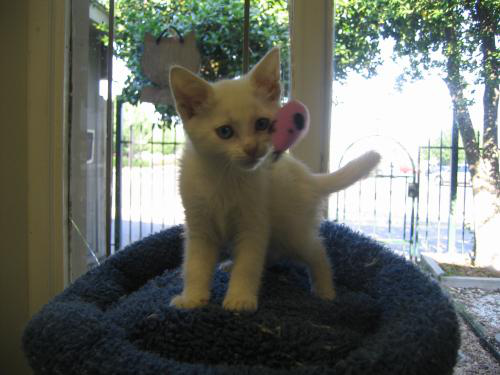

In [71]:
### check one image

with Image.open(image_list[5]) as img:
    print(f'Original Image file: {image_list[5]}')
    display(img)

In [72]:
my_image = Image.open(image_list[5])

print(my_image.getpixel((0,0)))  ## get the pixel

(55, 52, 33)


Image shape: torch.Size([3, 375, 500])


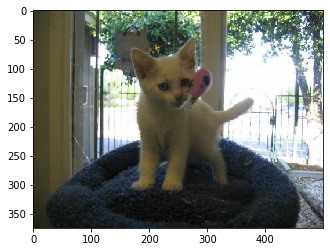

In [73]:
### convert to tensor

transform = transforms.Compose([
    transforms.ToTensor()
])

img = transform(my_image)
print(f'Image shape: {img.shape}')
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

Transformed image size  torch.Size([3, 224, 298])


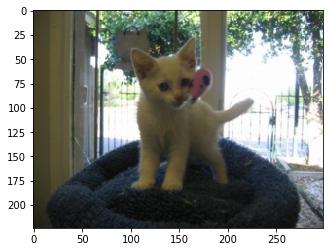

In [74]:
### resize the image

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
print("Transformed image size ",img.shape)
plt.show()

Transformed image size  torch.Size([3, 400, 224])


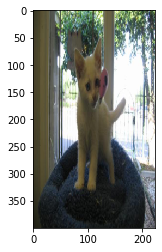

In [75]:
### resize the image

transform = transforms.Compose([
    transforms.Resize((400,224)),
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
print("Transformed image size ",img.shape)
plt.show()

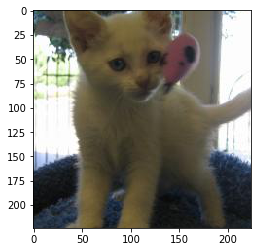

In [76]:
### center crop transform

transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

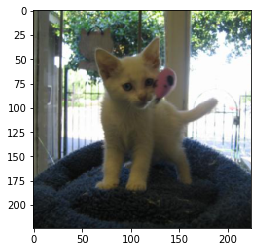

In [77]:
### combination of resize and crop

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

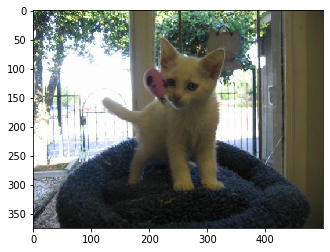

In [78]:
### Random Horizontal flip

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1), ## p is the probability. default is 0.5
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

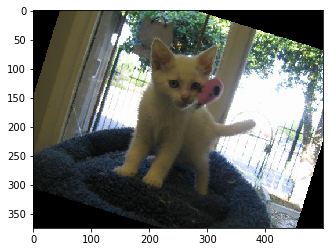

In [79]:
## Random Rotation

transform = transforms.Compose([
    transforms.RandomRotation(degrees=30), ## rotation by +/- 30 degrees
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

## combining all of the transformations together

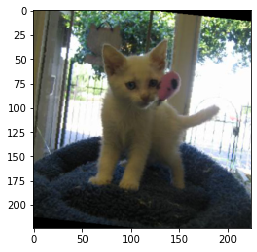

In [80]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

img = transform(my_image)
plt.imshow(np.transpose(img.numpy(),(1,2,0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 375, 500])


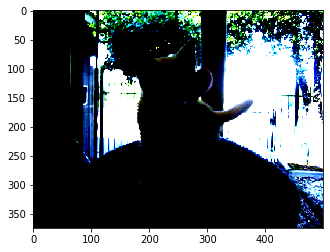

In [81]:
### NORMALISATION
### make the convulation better and faster

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
im = transform(my_image)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

# Transform the test and train data

In [82]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),      # rotate +/- 10 degrees
    transforms.RandomHorizontalFlip(),  # reverse 50% of images
    transforms.Resize(224),             # resize shortest side to 224 pixels
    transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),             # resize shortest side to 224 pixels
    transforms.CenterCrop(224),         # crop longest side to 224 pixels at center
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [83]:
## prepare the data

train_data = datasets.ImageFolder(os.path.join(DATA_PATH,'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(DATA_PATH,'test'), transform=test_transform)

In [84]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=10)
test_loader = DataLoader(test_data, shuffle=False, batch_size=10)

In [85]:
class_names = train_data.classes

print(class_names)

['CAT', 'DOG']


In [87]:
print(f'Total Train images: {len(train_data)}')
print(f'Total Test images: {len(test_data)}')

Total Train images: 18743
Total Test images: 6251


Label: [0 0 1 0 1 1 1 0 0 1]
Class: ['CAT' 'CAT' 'DOG' 'CAT' 'DOG' 'DOG' 'DOG' 'CAT' 'CAT' 'DOG']


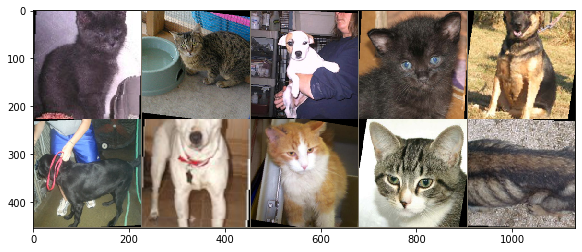

In [90]:
### print the batch of images for sample test

for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

# Model

In [91]:
class JPEGCNNModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv2d1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2d2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)  ## (((224-2)/2)-2)/2 = 54.5 ~ 54
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        
    def forward(self,x):
        
        x = nn.functional.relu(self.conv2d1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2d2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 54*54*16)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.log_softmax(x, dim=1)
        
        return x

In [92]:
model = JPEGCNNModel()
model

JPEGCNNModel(
  (conv2d1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2d2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [95]:
epochs = 3

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f} accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

epoch:  0  batch:  200 [  2000/8000]  loss: 2.42197657  accuracy:  51.150%
epoch:  0  batch:  400 [  4000/8000]  loss: 3.75290108  accuracy:  51.075%
epoch:  0  batch:  600 [  6000/8000]  loss: 2.36034346  accuracy:  50.467%
epoch:  0  batch:  800 [  8000/8000]  loss: 3.25841141  accuracy:  50.212%
epoch:  1  batch:  200 [  2000/8000]  loss: 4.00203323  accuracy:  48.850%
epoch:  1  batch:  400 [  4000/8000]  loss: 1.63282609  accuracy:  49.200%
epoch:  1  batch:  600 [  6000/8000]  loss: 4.05839300  accuracy:  49.817%
epoch:  1  batch:  800 [  8000/8000]  loss: 1.31294465  accuracy:  49.675%
epoch:  2  batch:  200 [  2000/8000]  loss: 2.52960777  accuracy:  49.200%
epoch:  2  batch:  400 [  4000/8000]  loss: 2.77018523  accuracy:  49.000%
epoch:  2  batch:  600 [  6000/8000]  loss: 2.83203983  accuracy:  49.017%
epoch:  2  batch:  800 [  8000/8000]  loss: 2.85470915  accuracy:  49.138%


In [97]:
torch.save(model.state_dict(), 'Jpeg_cnn_model.pt')

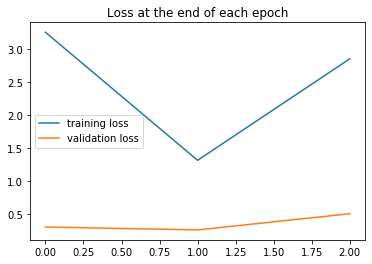

In [98]:
## plot the loss

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

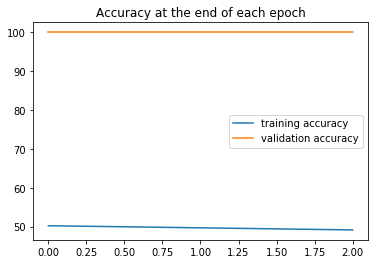

In [100]:
plt.plot([t.numpy()/80 for t in train_correct], label='training accuracy')
plt.plot([t.numpy()/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [101]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(3000), tensor(3000), tensor(3000)]
Test accuracy: 100.000%


# Using ALEXNET

In [102]:
import torchvision.models as models

In [103]:
AlexNetModel = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /Users/rishushrivastava/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [104]:
AlexNetModel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [106]:
### Freeze the parameters in the model

for param in AlexNetModel.parameters():
    param.requires_grade = False

In [107]:
### modify the classifer to match the 2 image categories

AlexNetModel.classifier = nn.Sequential(
    nn.Linear(9216, 1024),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(1024, 2),
    nn.LogSoftmax(dim=1))

In [108]:
AlexNetModel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, 

In [110]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetModel.classifier.parameters(), lr=0.001) ## we only train the classifer bit.

In [111]:
epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetModel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetModel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

epoch:  0  batch:  200 [  2000/8000]  loss: 0.83896714  accuracy:  89.550%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.39697549  accuracy:  91.325%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.24762443  accuracy:  92.300%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.09962291  accuracy:  92.713%


In [112]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/3000:.3f}%')

[tensor(2869)]
Test accuracy: 95.633%


# Predicting on New Images

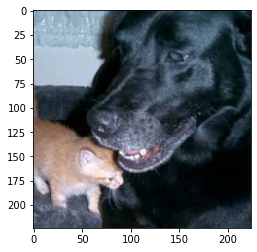

In [120]:
x = 1222
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [121]:
test_data[x][0].shape

torch.Size([3, 224, 224])

In [122]:
# CNN Model Prediction:
model.eval()
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 0 CAT


In [123]:
# AlexNet Model Prediction:

AlexNetModel.eval()
with torch.no_grad():
    new_pred = AlexNetModel(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

Predicted value: 1 DOG
